# Statistiska Metoder Laboration


### Analys av iris datasetet.

Frågeställningar och arbetsgång:
- Jag delar in arbetet i olika faser av analys. Denna notebook följer den arbetsgången.
- Iris datasetet innehåller data på längd och bredd för bägarblad (sepal) och kronblad (petal), för tre olika sorters iris blomma.
- Det finns data för totalt 150 bloomor, 50 av varje iris sort.
- Analysen kommmer kretsa runt dessa metrics, tex medelvärden, spridningsmått mm för de olika sorterna av iris, även jämförelser av populationer.
- Eftersom datan kommer från naturen bör mycket vara normalfördelat. Det blir intressant att se om vi kan konstatera det.
- Datan samlades in av biologen Ronald Fischer 1936. - Datasetet bör kunna anses som ett stickprov från en population (populationen = alla världens iris blommor av de aktuella typerna), så en del av min analys kommer gå ut på att skatta populationen baserat på stickprovet.

Grundläggande analys av datasetet:
- Syfte: Få en förståelse av datasetet och vad det innehåller genom olika basic Pandas funktioner. Såsom, hur stort är datasetet, vilka variabler innehåller det, finns det nan's som bör rensa bort, osv.

Statistiska mått:
- medelvärde, median, typvärde med mera för de olika metrics, för varje class av iris. Även kvartiler.
- gör bar plots för de fyra metrics, för varje iris sort, i samma plot.
- är längd och bredd på kronblad och bägarblad normalfördelade?
    - gör histogram med de tre olika arterna av iris.
- beräkna skewness

Diagram:
- Plotta sepal_lenght mot sepal_width i samma diagram, för alla tre arterna. Gör samma för petal_length och petal_width.

Konfidensintervall:
- Datasetet är ett stickprov från en större population. Skatta populationens väntevärde (my) och spridningsmått (sigma), baserat på stickprovsdata. Finns det funktioner för detta i SciPy?

Hypotestest:
- Jämför de 3 olika populationerna av iris, baserat tex på petal_length. Är det en signifikant skillnad mellan populationerna? Dvs, är population A skild från population B?
- en hypotes kan vara att versicolor är lika stor som virginica, det är samma population. (det stämmer förmodligen inte dock...)

Prediktion:
- VG uppgift
- Om man har metrics från en blomma av okänd class, gör någon form av prediktion av vilken class det är. Kanske nearest neighbour?

Linär Regressions modell:
- VG uppgift
- Kanske för sepal_length och sepal_width? För alla tre iris typer.

Övrigt:
- Om man tar en slumpmässig blomma (av känd class) från populationen (=riktiga världen), hur stor är sannolikheten att tex sepal_length är större än ett visst värde? Vad är väntevärde?

### Att lära mig:
repetera alla basic pandas funktioner för att analysera en datamängd
hur man kollar vilka kategorier det finns i dataframen
hur man kollar hur många av en viss kategori det finns
hur man hanterar scipy's olika funktioner för normalfördelning, t-fördelning, statistik med mera.
mer om plottning i seaborn

### funderingar:
hur ska jag göra en regression? På vilka metrics?


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Läser in datasetet

In [132]:
iris = pd.read_csv('../Data/iris.csv') #read in the data as a Pandas Dataframe

# Grundläggande analys av datasetet:
- För att få insikt i datasetet gör jag en del basic analys med olika pandas funktioner. Syftet är att ta reda på hur stort datasetet är, vilka datatyper som finns i det, vilka olika data som finns representerat (kolumner), om det finns nan's som behöver hanteras osv.

In [133]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [134]:
iris.columns

Index(['sepal_length', ' sepal_width', ' petal_length', ' petal_width',
       ' class'],
      dtype='object')

#### Jag ser att några av kolumnernas namn börjar med ett whitespace. För att förenkla, så döper jag om dessa.
- Efteråt kollar jag att kolumnernas namn ser bra ut, och det gör det.

In [135]:
iris.rename(columns={' sepal_width':'sepal_width',' petal_length':'petal_length',' petal_width':'petal_width',' class':'class'}, inplace=True)

In [136]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

#### Jag undersöker hur många olika sorters iris det finns i datasetet, samt hur många stickprov av varje sort.
- Det finns 3 olika iris sorter och det är 50 stickprov av varje sort.
- De olika iris sorterna heter setosa, versicolor och virginica.

In [137]:
iris["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Jag väljer att döpa om blommorna i kolumnen 'class', tar bort den överflödiga informationen "Iris-" samt sätter stor bokstav.

In [140]:
iris.replace({'Iris-':''}, regex=True, inplace=True ) # tar bort "Iris-"
iris['class']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

#### Kollar om det finns några nan's.
- Det finns inga nan's.

In [141]:
iris.isna().sum()/len(iris)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
class           0.0
dtype: float64

### Identiferar vilka olika datatyper det finns i datasetet.
-  Alla numeriska värden på bladens bredd och längd är float64 och class är object.
- Det är 150 non-null värden i varje kolumn, det finns alltså inga nan's att ta hand om.

In [142]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Statistiska mått

#### Pandas funktionen describe räknar ut flera intressanta data för varje kolumn i datasetet, såsom tex:
- medelvärde (mean)
- kvartiler
- median (50%), 50-percentile
- min, max

Gör en loop som loopar igenom alla iris classerna, tar fram alla metrics med describe och sparar varje i en excel fil, som kan användas i rapporten.

In [143]:
list_of_class = iris['class'].unique().tolist() #skapar en lista med strings för varje unikt namn på iris-blommorna

for item in list_of_class: #loopar igenom listan och skapar en dataframe som innehåller allt som man får med describe funktionen som sparas i en excel fil
    df_to_xls = pd.DataFrame(iris[iris['class'] == item].describe())
    filename = str(item)
    filepath = "../Lab/" + filename + ".xlsx" #skapar en file path med rätt namn
    df_to_xls.to_excel(filepath) # skriver till en excel fil

#### Grouped boxplots

<Axes: xlabel='class', ylabel='sepal_length'>

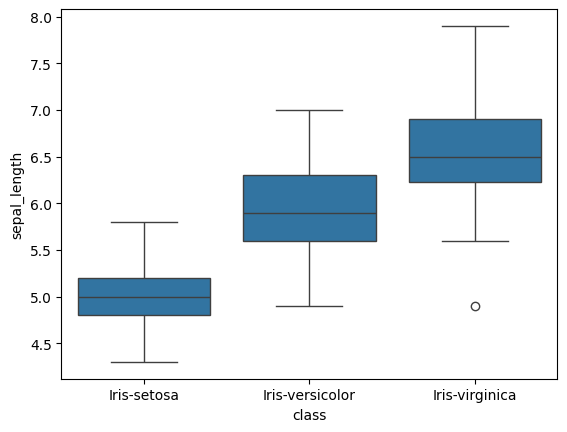

In [54]:
sns.boxplot(x="class", y="sepal_length", data=iris)

#### Anpassa en normalfördelning till experimentell data
- gör detta för en av iris sorterna och för tex bredden på sepal blad.

#### Linear regression

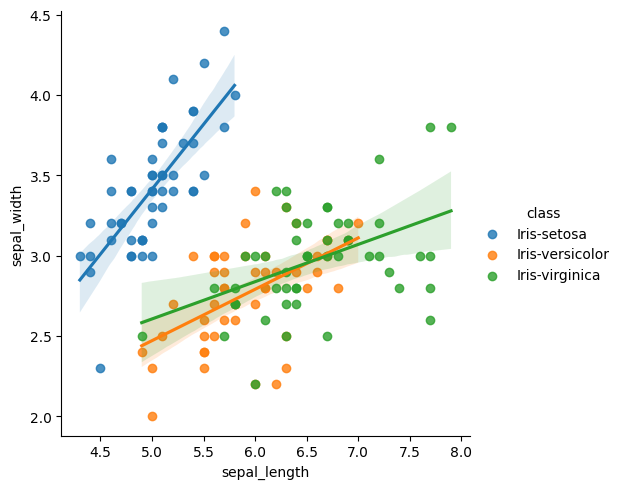

In [55]:
sns.lmplot(data=iris, x='sepal_length', y='sepal_width', hue='class')

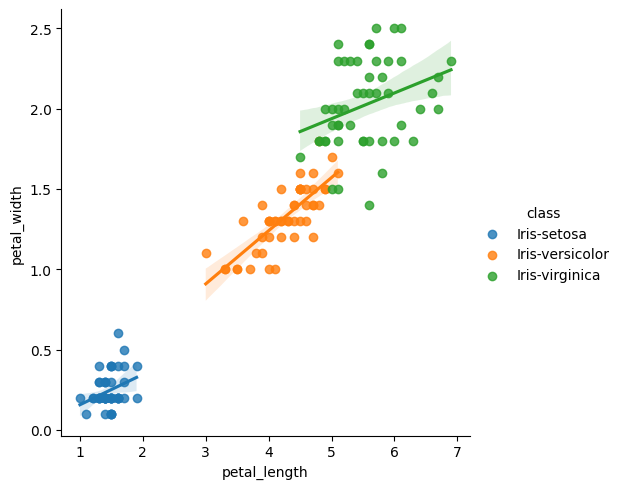

In [56]:
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='class')

#### Scatterplot matrix

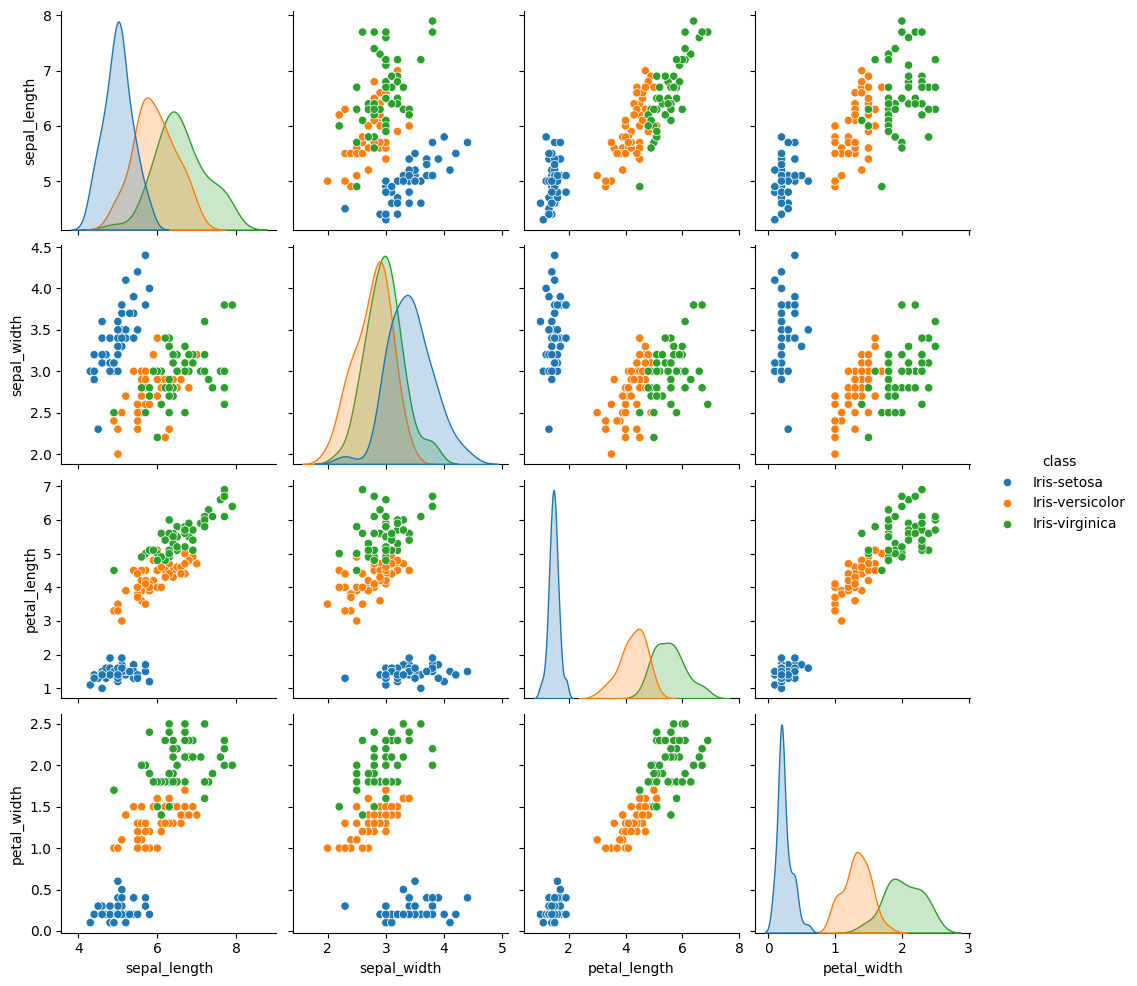

In [57]:
sns.pairplot(data=iris, hue='class')